# Prática 3: Aumento do nível do mar em Cananéia, SP

Você trabalhará com dados de uma série histórico de nível do mar na base do IO em Cananéia de 1954 até 2006 (em breve teremos os dados até o presente)

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Passo 1: carregue os dados em um _pandas_ _dataframe_

Os dados estão disponíveis em: https://tidesandcurrents.noaa.gov/sltrends/sltrends_station.shtml?id=874-051. Para obter o url com o arquivo de dados, clique em "Export to text".

In [2]:
url = 'https://tidesandcurrents.noaa.gov/sltrends/data/874-051_meantrend.txt'

# baseado na leitura do cabeçalho do arquivo, define o nome das colunas
cols=['year','month','sealevel','linear_trend','high_conf','low_cong']

# leia os dados direto da Web, pulando o cabeçalho e considerando apenas as três primeira columnas
df = pd.read_csv(url,header=6,delim_whitespace=True,names=cols,usecols=['year','month','sealevel'])

In [3]:
df

,year,month,sealevel
0,1954,5,6.871
1,1954,6,6.809
2,1954,7,6.800
3,1954,8,6.776
4,1954,9,6.834
...,...,...,...
608,2006,8,7.182
609,2006,9,7.157
610,2006,10,7.071
611,2006,11,7.121


### Passo 2: crie uma série de datas 

Os dados estão disponível como médias mensais de nível do mar para cada ano/mês. Para trabalhar mais facilmente com os dados, criar um `timestamp` que é melhor entendido pelo python em cálculos e plotagens. A função `datatime` requer a especificação do dia, além dê mês e ano. Como estamos trabalhando com médias mensais, escolhemos `day=15` como representativo do meio do mês.

In [18]:
# cria array de datetime64 e o coloca no dataframe de nível do mar
time =  [np.datetime64(datetime.datetime(year=df['year'][k],month=df['month'][k],day=1))
    for k in range(len(df['year']))]

time = np.array(time)

# coloca a variável time em df
df['time'] = pd.to_datetime(time)

# indexa a série de tempo com a variável time
df = df.set_index('time')

In [19]:
df

,year,month,sealevel
time,,,
1954-05-01,1954,5,6.871
1954-06-01,1954,6,6.809
1954-07-01,1954,7,6.800
1954-08-01,1954,8,6.776
1954-09-01,1954,9,6.834
...,...,...,...
2006-08-01,2006,8,7.182
2006-09-01,2006,9,7.157
2006-10-01,2006,10,7.071


### Passo 3: Visualize os dados

Plote a série temporal de nível médio do mar. Lembre-se de colocar labels no gráfico. Escreva algumas anotações sobre seu gráfico. Qual comportamento do nível do mar ao longo das décadas? Qual amplitude da variabilidade? Estimate visualmente a taxa de aumento do nível do mar nos últimos 50 anos.

### Passo 4:  Estime a tendência linear do nível do mar

Utilizando a função `np.polyfit`, ajuste uma reta $y = a + b t$ (polinômio de grau 1) à série temporal de nível do mar. A inclinação da reta $b$ é a tedência linear, que deve ser apresentada em mm/ano. **Compare** os resultados com a estimativa visual que você fez no Passo 3. **Visualize** a reta ajustada, plotando-a junto com a série temporal do nível do mar. 

Você deve obter algo assim:

<br>
<img src=https://raw.githubusercontent.com/f-lab-USP/computational_bootcamp/main/python/img/niveldomar_mediamensal_cananeia.png>
</br>

In [6]:
# DICA: para utilizar  a função polyfit, você precisará de um variável `tempo decorrido` (elapsed time)
#  desde o início da série temporal. Aqui, aproveitamos a variável `time`. A diferença entre time e
# time[0] é o tempo decorrido em micro-segundos. Precisamos converte este tempo decorrido para fração de ano:
time_years = (time-time[0]).astype('float')/1.e6/86400/365

### Passo 5: Cálcule a média anual do nível médio do mar e repita o cálculo de tendência

Utilizando a função `groupby` do pandas, calcule a média anual do nível do mar.  **Repita** o cálculo de tendência, compare o resultado com a estimativa baseada em médias mensais. **Visualize** os resultados. 

Você deve obter algo assim:


<br>
<img src=https://raw.githubusercontent.com/f-lab-USP/computational_bootcamp/main/python/img/niveldomar_mediamensal_mediaanual_cananeia.png>
</br>


### Passo 6: Remova a tendência do nível médio do mar e estude a variabilidade inter-annual

Utilizando dos dados promediados anualmente, remova a tendência linear e obtenha uma séria temporal de anomalia do nível do mar. **Calcule** as estatísticas básicas da anomalia do nível do mar utilizando a função `describe` do pandas.  **Visualize** o resultado, indicando em que períodos em que a anomalia do nível do mar foi positiva  e negativa.


Você deve obter algo assim:

<br>
<img src=https://raw.githubusercontent.com/f-lab-USP/computational_bootcamp/main/python/img/anomalia_niveldomar_cananeia.png>
</br>

### Passo 7: Calcule a correlação entre nível médio do mar anual e o nível de CO2 atmosférico
Carregue os dados da curva de Keeling (lembre-se do Tutorial 3) e utilize a função `np.corrcoef` para calcular a correlação entre o nível do mar médio anual (com tendência linear) e a concentração de CO2 atmosférico.  Discuta os resultados e especule sobre as causas do aumento do nível do mar em Cananéia.

In [13]:
url = 'https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv'
mlo = pd.read_csv(url,sep=',')

# remove negative values (flag para ausência de dados)
mlo = mlo.where(mlo.Average>0).dropna()

In [14]:
mlo

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1.0
1,1958-04-01,1958.292,317.45,317.45,315.29,-1.0
2,1958-05-01,1958.375,317.50,317.50,314.71,-1.0
4,1958-07-01,1958.542,315.86,315.86,314.98,-1.0
5,1958-08-01,1958.625,314.93,314.93,315.94,-1.0
...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24.0
723,2018-06-01,2018.458,410.79,410.79,408.49,29.0
724,2018-07-01,2018.542,408.71,408.71,408.32,27.0
725,2018-08-01,2018.625,406.99,406.99,408.90,30.0


In [15]:
time_mlo =  [np.datetime64(mlo.Date[k]) 
    for k in mlo.index]

time_mlo = np.array(time_mlo)
mlo = mlo.set_index(time_mlo)

In [16]:
mlo.index


DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-07-01',
               '1958-08-01', '1958-09-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', length=720, freq=None)

In [17]:
df

,year,month,sealevel
time,,,
1954-05-15,1954,5,6.871
1954-06-15,1954,6,6.809
1954-07-15,1954,7,6.800
1954-08-15,1954,8,6.776
1954-09-15,1954,9,6.834
...,...,...,...
2006-08-15,2006,8,7.182
2006-09-15,2006,9,7.157
2006-10-15,2006,10,7.071


In [20]:
# acha os indices de intersecao
idx = df.index.intersection(mlo.index)

In [21]:
idx

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-07-01',
               '1958-08-01', '1958-09-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01',
               ...
               '2004-10-01', '2004-11-01', '2004-12-01', '2006-06-01',
               '2006-07-01', '2006-08-01', '2006-09-01', '2006-10-01',
               '2006-11-01', '2006-12-01'],
              dtype='datetime64[ns]', length=560, freq=None)

In [24]:
df_subset = df.loc[idx]
mlo_subset = mlo.loc[idx]

In [25]:
len(df_subset), len(mlo_subset)

(560, 560)

In [27]:
# calcula coeficiente de correlacao
coefs = np.corrcoef(df_subset.sealevel,mlo_subset.Average)
corr_coef = np.round(coefs[0,1],2)
corr_coef

0.64

In [28]:
# calculata ajuste de reta
b3, a3 = np.polyfit(mlo_subset.Average,df_subset.sealevel,deg=1)

Text(0.5, 1.0, 'Coeficiente de correlação: 0.64')

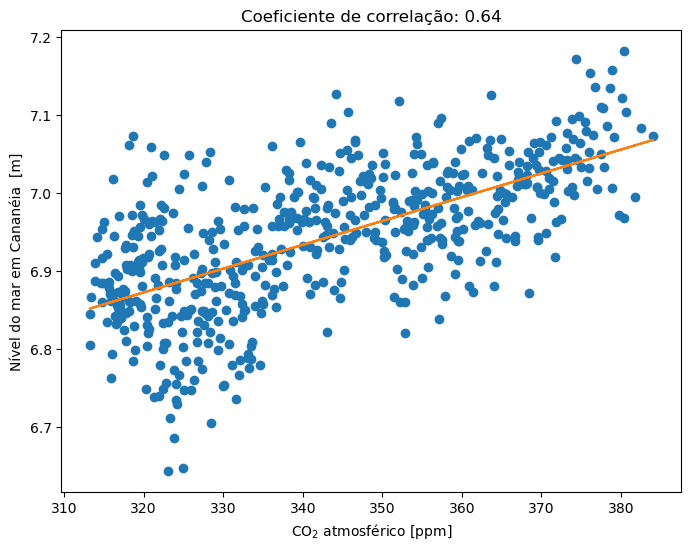

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(mlo_subset.Average, df_subset.sealevel)
ax.plot(mlo_subset.Average, a3 + b3*mlo_subset.Average,color='C1')
ax.set_xlabel('CO$_2$ atmosférico [ppm]')
ax.set_ylabel('Nível do mar em Cananéia  [m]')
plt.title('Coeficiente de correlação: {}'.format(corr_coef))